## Set up Colab environment

In [98]:
!git clone https://github.com/hayakzan/VAE_experiment

fatal: destination path 'VAE_experiment' already exists and is not an empty directory.


In [ ]:
cd VAE_experiment

/content/VAE_experiment


In [ ]:
!unzip dataset.zip

Archive:  dataset.zip
replace dataset/pixil-frame-0 (7).png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: dataset/pixil-frame-0 (7).png  
  inflating: __MACOSX/dataset/._pixil-frame-0 (7).png  
  inflating: dataset/pixil-frame-0 (6).png  
  inflating: __MACOSX/dataset/._pixil-frame-0 (6).png  
  inflating: dataset/pixil-frame-0 (1).png  
  inflating: __MACOSX/dataset/._pixil-frame-0 (1).png  
  inflating: dataset/pixil-frame-0 (3).png  
  inflating: __MACOSX/dataset/._pixil-frame-0 (3).png  
  inflating: dataset/pixil-frame-0 (2).png  
  inflating: __MACOSX/dataset/._pixil-frame-0 (2).png  
  inflating: dataset/pixil-frame-0 (5).png  
  inflating: __MACOSX/dataset/._pixil-frame-0 (5).png  
  inflating: dataset/pixil-frame-0 (8).png  
  inflating: __MACOSX/dataset/._pixil-frame-0 (8).png  
  inflating: dataset/pixil-frame-0 (4).png  
  inflating: __MACOSX/dataset/._pixil-frame-0 (4).png  


In [ ]:
from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Train VAE on graphs

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model

from ml.utils import load_lego_faces, load_model, generate_morph_images, plot_reconstructed_images ##guessing morph_images is generate_morph_images
from ml.variational_autoencoder import VariationalAutoencoder

In [ ]:
lego_face_dict = load_lego_faces(size=64)
lego_faces = np.array(list(lego_face_dict.values()))

In [ ]:
encoder_params = [
    {"filters": 64, "kernel_size": 3, "strides": 1},
    {"filters": 64, "kernel_size": 3, "strides": 2},
    {"filters": 64, "kernel_size": 3, "strides": 2},
    {"filters": 64, "kernel_size": 3, "strides": 2},
    {"filters": 64, "kernel_size": 3, "strides": 1},
]

decoder_params = [
    {"filters": 64, "kernel_size": 3, "strides": 1},
    {"filters": 64, "kernel_size": 3, "strides": 2},
    {"filters": 64, "kernel_size": 3, "strides": 2},
    {"filters": 32, "kernel_size": 3, "strides": 2},
    {"filters": 3, "kernel_size": 3, "strides": 1},
]

vae = VariationalAutoencoder(
    input_dim = (64, 64, 3),
    latent_dim = 200,
    encoder_params=encoder_params,
    decoder_params=decoder_params,
)

#using model.save_weights() to save the weights of the model in HDF5 format
vae.save("/content/gdrive/My Drive/pkl")

In [ ]:
LEARNING_RATE = 0.0005
BATCH_SIZE = 32

In [ ]:
vae.compile_model(lr=LEARNING_RATE, r_loss_factor=10000)

In [ ]:
vae.train(
    lego_faces,
    batch_size=BATCH_SIZE,
    epochs=200
)

Train on 8 samples
Epoch 1/200
8/8 [==============================] - ETA: 0s - loss: 3262.8462 - vae_r_loss: 3089.1831 - vae_kl_loss: 173.6630
Epoch 00001: saving model to model_output/weights.h5
8/8 [==============================] - 4s 532ms/sample - loss: 3262.8462 - vae_r_loss: 3089.1831 - vae_kl_loss: 173.6630
Epoch 2/200
8/8 [==============================] - ETA: 0s - loss: 3037.9932 - vae_r_loss: 2959.2212 - vae_kl_loss: 78.7722
Epoch 00002: saving model to model_output/weights.h5
8/8 [==============================] - 0s 45ms/sample - loss: 3037.9932 - vae_r_loss: 2959.2212 - vae_kl_loss: 78.7722
Epoch 3/200
8/8 [==============================] - ETA: 0s - loss: 2885.0774 - vae_r_loss: 2813.1577 - vae_kl_loss: 71.9197
Epoch 00003: saving model to model_output/weights.h5
8/8 [==============================] - 0s 37ms/sample - loss: 2885.0774 - vae_r_loss: 2813.1577 - vae_kl_loss: 71.9197
Epoch 4/200
8/8 [==============================] - ETA: 0s - loss: 2748.9443 - vae_r_loss:

## Do the fun stuff with the VAE

In [ ]:
import numpy as np
from ml.utils import (
    animate_morph_images,
    load_lego_faces,
    load_model,
    plot_morph_images,
    plot_random_faces,
    plot_reconstructed_images,
)

vae = load_model(path='')

lego_face_dict = load_lego_faces(size=64)
filenames, lego_faces = zip(*lego_face_dict.items())
lego_faces = np.array(list(lego_faces))

common_kwargs = {
    'encoder': vae.encoder_model,
    'decoder': vae.decoder_model,
}

FileNotFoundError: ignored

### Reconstruct faces

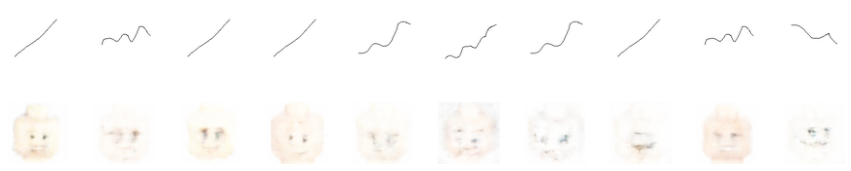

In [ ]:
plot_reconstructed_images(data=lego_faces, **common_kwargs)

### Generate new faces

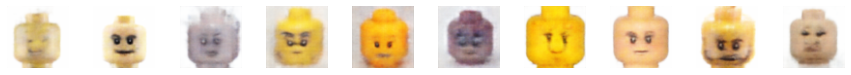

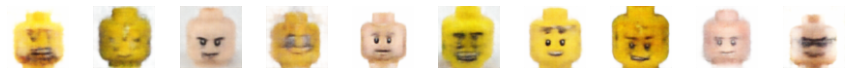

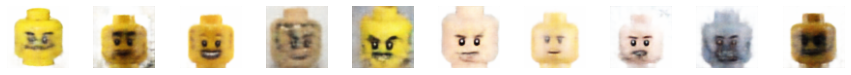

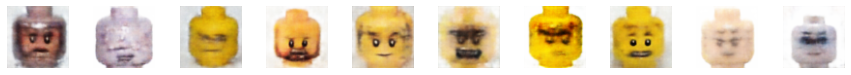

In [ ]:
plot_random_faces(vae.decoder_model)
plot_random_faces(vae.decoder_model)
plot_random_faces(vae.decoder_model)
plot_random_faces(vae.decoder_model)

### Do face morphs

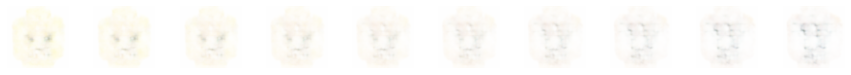

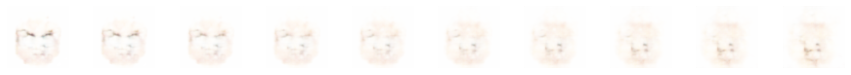

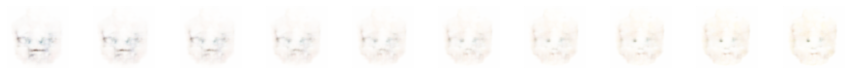

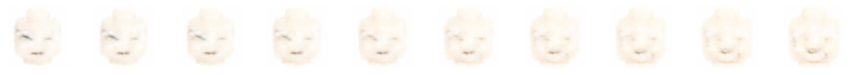

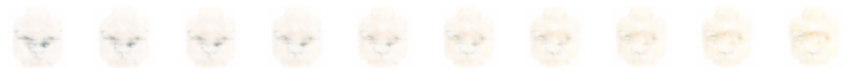

In [ ]:
pairs = [
    ('pixil-frame-0 (1).png', 'pixil-frame-0 (4).png'),
    ('pixil-frame-0 (2).png', 'pixil-frame-0 (5).png'),
    ('pixil-frame-0 (3).png', 'pixil-frame-0 (6).png'),
    ('pixil-frame-0 (4).png', 'pixil-frame-0 (7).png'),
    ('pixil-frame-0 (5).png', 'pixil-frame-0 (8).png'),
]

for f1, f2 in pairs:
    plot_morph_images(
        lego_face_dict[f1], 
        lego_face_dict[f2],
        **common_kwargs,
    )

In [ ]:
f1, f2 = pairs[3]
clip = animate_morph_images(
    lego_face_dict[f1], 
    lego_face_dict[f2],
    n_steps=90,
    **common_kwargs,
)
clip.ipython_display(width=400)

100%|██████████| 216/216 [00:00<00:00, 5481.09it/s]


### Make t-SNE plots

In [ ]:
encodings = np.asarray(vae.encoder_model.predict(lego_faces), dtype=np.float64)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

enc_50d = PCA(n_components=50).fit_transform(encodings)
tsne_coords = TSNE(n_components=2).fit_transform(enc_50d)

ValueError: ignored

In [ ]:
from os.path import join
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

offset = 0
num_to_show = 4000

x_coords, y_coords = list(zip(*tsne_coords[offset:offset + num_to_show]))
relevant_files = filenames[offset:offset + num_to_show]

fig, ax = plt.subplots(figsize=(50, 50))
ax.axis('off')
ax.set_xlim(-50, 50)
ax.set_ylim(-50, 50)

i = 0
for x, y, filename in zip(x_coords, y_coords, relevant_files):
    ab = AnnotationBbox(
        OffsetImage(plt.imread(join('dataset', filename)), zoom=0.2),
        xy=(x, y),
        frameon=False,
    )
    ax.add_artist(ab)
    i += 1

plt.show()